<a href="https://colab.research.google.com/github/VanTam23/AI/blob/main/Bai1_NhanDien_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload = files.upload()

Saving dataset.pickle to dataset.pickle


In [ ]:
import cv2
import numpy as np
import pickle
from keras.utils import np_utils
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [ ]:
#Load data
with open('dataset.pickle', 'rb') as d:
    (x_train, y_train) = pickle.load(d)
x_train.shape
# Reshape Data
x_pre = x_train[90]
x_pre1 = x_train[170]
x_pre2 = x_train[118]
x_train = x_train[:199] # had 200 img
y_train = y_train[:199]

In [ ]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)

# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255
# Encoding Y
y_train = np_utils.to_categorical(y_train, 2)
# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)
x_train[0]

array([0.10588235, 0.08627451, 0.09019608, ..., 0.9098039 , 0.92156863,
       0.9137255 ], dtype=float32)

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape = (67500,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 100, validation_split = 0.2)

Epoch 1/100
5/5 [==============================] - 1s 53ms/step - loss: 1.5568 - acc: 0.5063 - val_loss: 4.1450 - val_acc: 0.4250
Epoch 2/100
5/5 [==============================] - 0s 21ms/step - loss: 0.9849 - acc: 0.7911 - val_loss: 0.2368 - val_acc: 0.9500
Epoch 3/100
5/5 [==============================] - 0s 20ms/step - loss: 0.1294 - acc: 0.9620 - val_loss: 0.0306 - val_acc: 1.0000
Epoch 4/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0217 - acc: 1.0000 - val_loss: 0.0188 - val_acc: 1.0000
Epoch 5/100
5/5 [==============================] - 0s 22ms/step - loss: 0.0119 - acc: 1.0000 - val_loss: 0.0095 - val_acc: 1.0000
Epoch 6/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0062 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 1.0000
Epoch 7/100
5/5 [==============================] - 0s 22ms/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 8/100
5/5 [==============================] - 0s 22ms/step - loss: 0.0021 - acc: 1.00

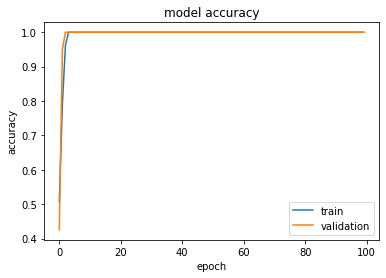

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'])
plt.show()

In [ ]:
#load test img

img1 = x_pre1.reshape(1,-1)
img1 = img1.astype('float32')
img1 /= 255
img = x_pre.reshape(1,-1)
img = img.astype('float32')
img /= 255
img2 = x_pre2.reshape(1,-1)
img2 = img2.astype('float32')
img2 /= 255

0


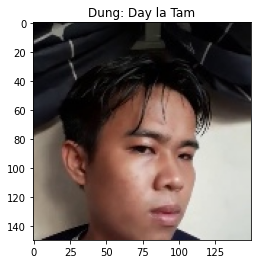

In [ ]:
#nhận dạng
k = np.argmax(model.predict(img))
print(k)
if k ==0:
  plt.title("Dung: Day la Tam")
if k == 1:
 plt.title("Sai: Day khong phai la Tam")

plt.imshow(cv2.cvtColor(x_pre, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

1


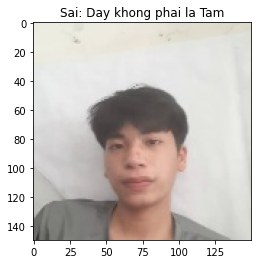

In [ ]:
#nhận dạng
k = np.argmax(model.predict(img1))
print(k)
if k ==0:
  plt.title("Dung: Day la Tam")
if k == 1:
 plt.title("Sai: Day khong phai la Tam")

plt.imshow(cv2.cvtColor(x_pre1, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

1


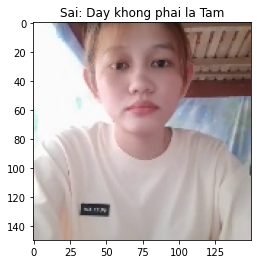

In [ ]:
#nhận dạng
k = np.argmax(model.predict(img2))
print(k)
if k ==0:
  plt.title("Dung: Day la Tam")
if k == 1:
 plt.title("Sai: Day khong phai la Tam")

plt.imshow(cv2.cvtColor(x_pre2, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))